<a href="https://colab.research.google.com/github/Victor-Mutuku/Classification-Models/blob/main/Victor_Mutuku_Classification_Models_CS_DA02_25021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [81]:
# Load the dataset and convert to DataFrame
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')

In [82]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [83]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [84]:
X.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


In [85]:
y.describe()

,target
count,178.000000
mean,0.938202
std,0.775035
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


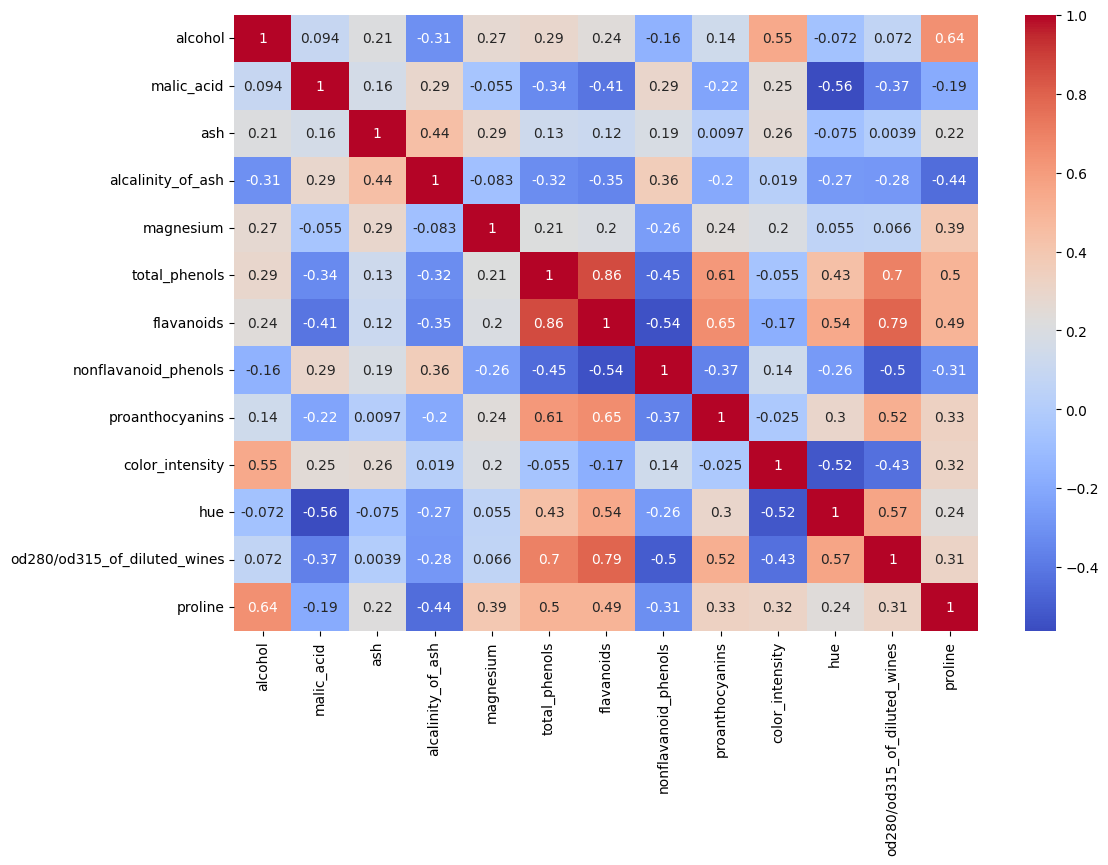

In [86]:
#Visualize the dataframe(X) using heatmaps
plt.figure(figsize=(12,8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.show()
#red --> positive correlation
#blue --> negative correlation
#white --> near zero correlation

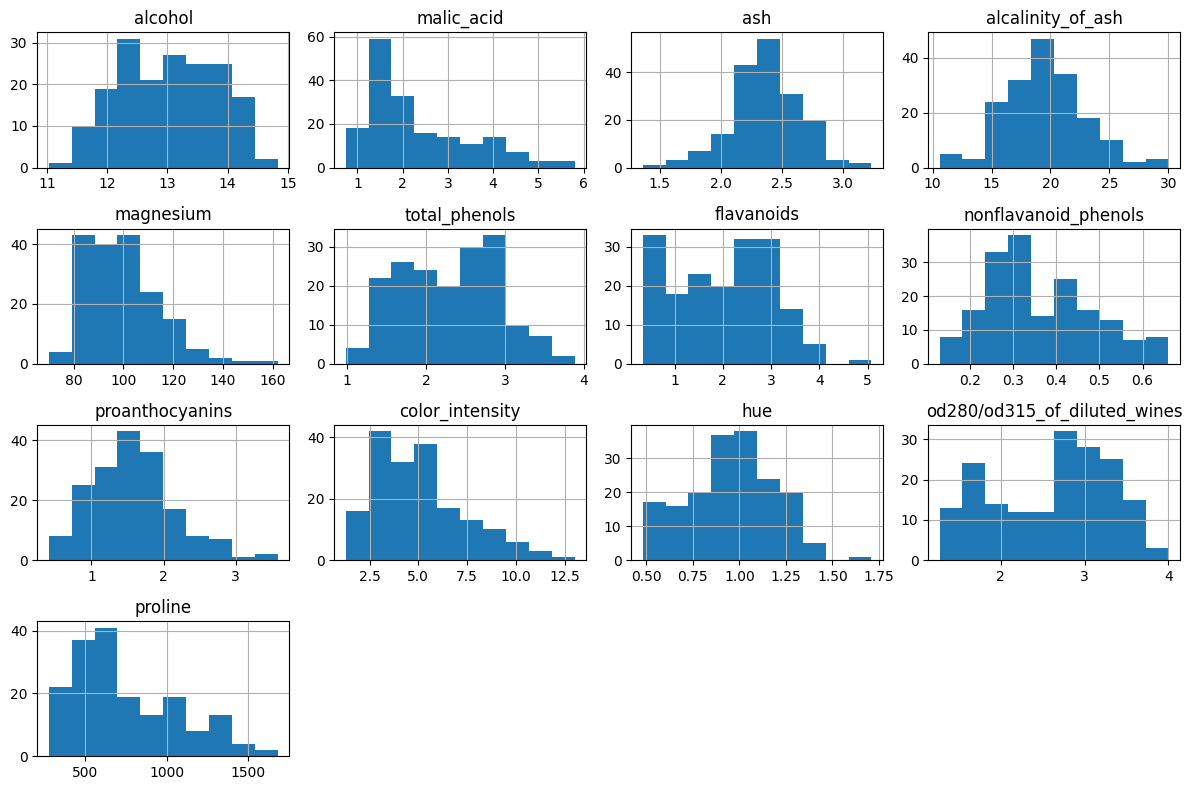

In [87]:
#Visualize the dataframe(X) using histograms
X.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

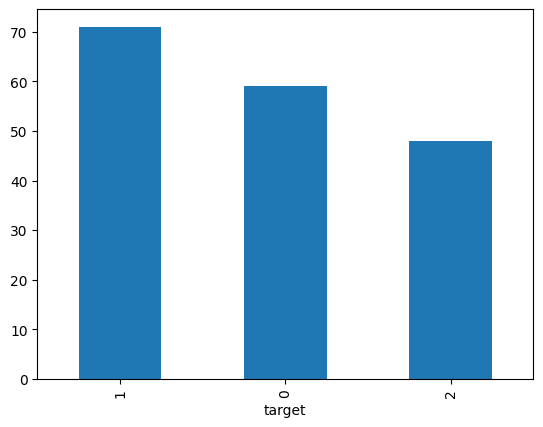

In [88]:
#Visualize the series(y) to see the class distribution
y.value_counts().plot(kind='bar')
plt.show()

In [89]:
#Test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
#Dataframe to save results
results=pd.DataFrame(columns=['Model','Accuracy'])
#Each model fills in one row everytime I run it

In [91]:
#Helper Function for Confusion Matrix plotting
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels='wine.target_names', yticklabels='wine.target_names')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
#I defined the confusion Matrix so I can call it per model below
#This is only a tool I call after training

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



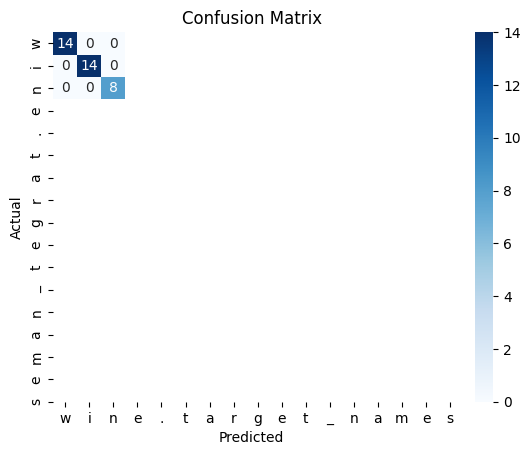

In [92]:
# MODELS
#1:Logistic Regression (Training, Predicting the model and visualizing)

lr = LogisticRegression(max_iter=1000) # creates the logistic model
lr.fit(x_train, y_train) #training step
y_pred_lr= lr.predict(x_test) #predicting step with the output of the model(y_pred_lr)

print("Logistic Regression\n", classification_report(y_test, y_pred_lr)) #calculates the precision,recall and F1-score
plot_confusion_matrix(y_test, y_pred_lr)
results.loc[len(results)] = ['Logistic Regression', accuracy_score(y_test, y_pred_lr)]

Decision Tree
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.88      1.00      0.93        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



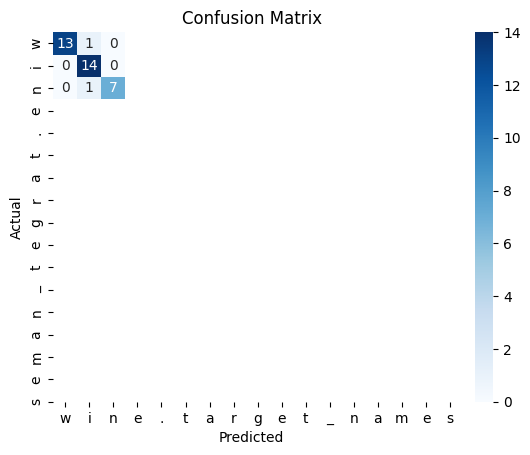

In [93]:
# 2:Decision Tree
dt= DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_dt= dt.predict(x_test)

print("Decision Tree\n", classification_report(y_test, y_pred_dt))
plot_confusion_matrix(y_test, y_pred_dt)
results.loc[len(results)] = ['Decision Tree', accuracy_score(y_test, y_pred_dt)]

Random Forest
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



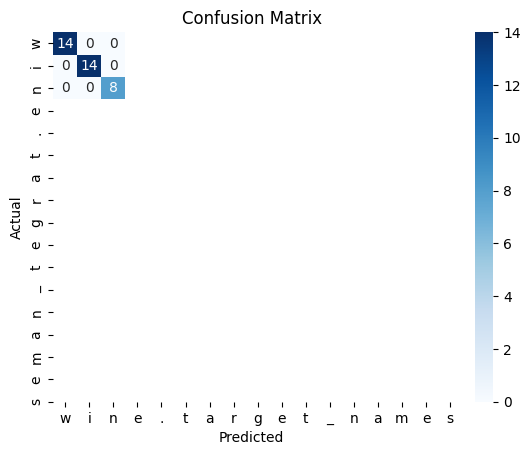

In [94]:
# 3:Random Forest
rf= RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_rf= rf.predict(x_test)

print("Random Forest\n", classification_report(y_test, y_pred_rf))
plot_confusion_matrix(y_test, y_pred_rf)
results.loc[len(results)] = ['Random Forest', accuracy_score(y_test, y_pred_rf)]

K-Nearest Neighbors
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.79      0.79      0.79        14
           2       0.38      0.38      0.38         8

    accuracy                           0.72        36
   macro avg       0.67      0.67      0.67        36
weighted avg       0.72      0.72      0.72        36



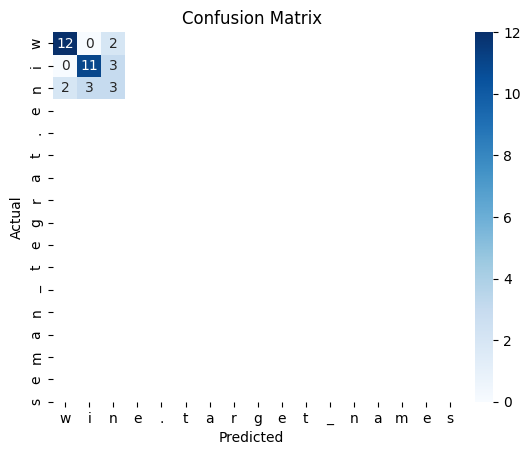

In [95]:
# 4:K-Nearest Neighbors(KNN)
knn= KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn= knn.predict(x_test)

print("K-Nearest Neighbors\n", classification_report(y_test, y_pred_knn))
plot_confusion_matrix(y_test, y_pred_knn)
results.loc[len(results)] = ['K-Nearest Neighbors', accuracy_score(y_test, y_pred_knn)]

Naive Bayes
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



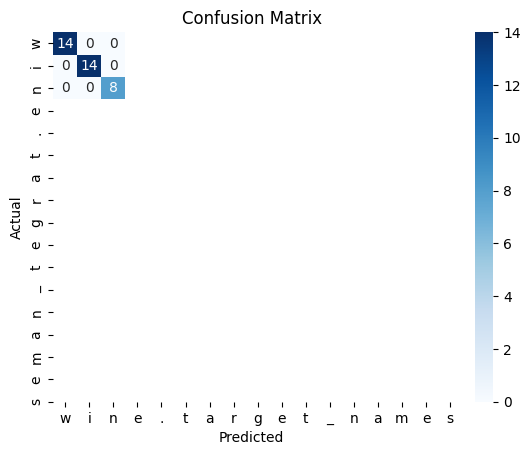

In [96]:
# 5:Naive Bayes
nb= GaussianNB()
nb.fit(x_train, y_train)
y_pred_nb= nb.predict(x_test)

print("Naive Bayes\n", classification_report(y_test, y_pred_nb))
plot_confusion_matrix(y_test, y_pred_nb)
results.loc[len(results)] = ['Naive Bayes', accuracy_score(y_test,y_pred_nb)]

Support Vector Machine
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.73      0.79      0.76        14
           2       0.57      0.50      0.53         8

    accuracy                           0.81        36
   macro avg       0.77      0.76      0.76        36
weighted avg       0.80      0.81      0.80        36



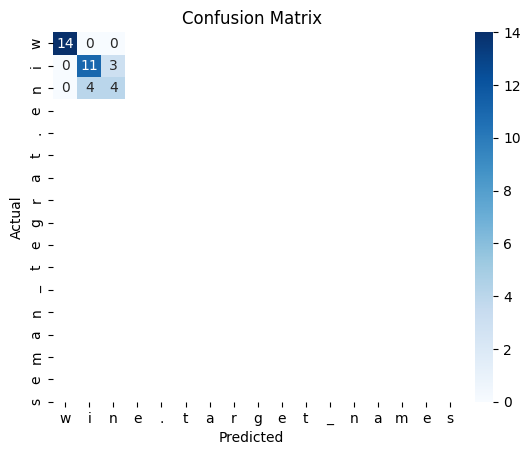

In [97]:
# 6:Support Vector Machine(SVM)
svm= SVC()
svm.fit(x_train, y_train)
y_pred_svm= svm.predict(x_test)

print("Support Vector Machine\n", classification_report(y_test, y_pred_svm))
plot_confusion_matrix(y_test, y_pred_svm)
results.loc[len(results)] = ['Support Vector Machine', accuracy_score(y_test, y_pred_svm)]

In [98]:
#Getting the Models results
print(results)

                    Model  Accuracy
0     Logistic Regression  1.000000
1           Decision Tree  0.944444
2           Random Forest  1.000000
3     K-Nearest Neighbors  0.722222
4             Naive Bayes  1.000000
5  Support Vector Machine  0.805556


In [101]:
#Getting results orderly
results.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,1.000000
2,Random Forest,1.000000
4,Naive Bayes,1.000000
1,Decision Tree,0.944444
5,Support Vector Machine,0.805556
3,K-Nearest Neighbors,0.722222


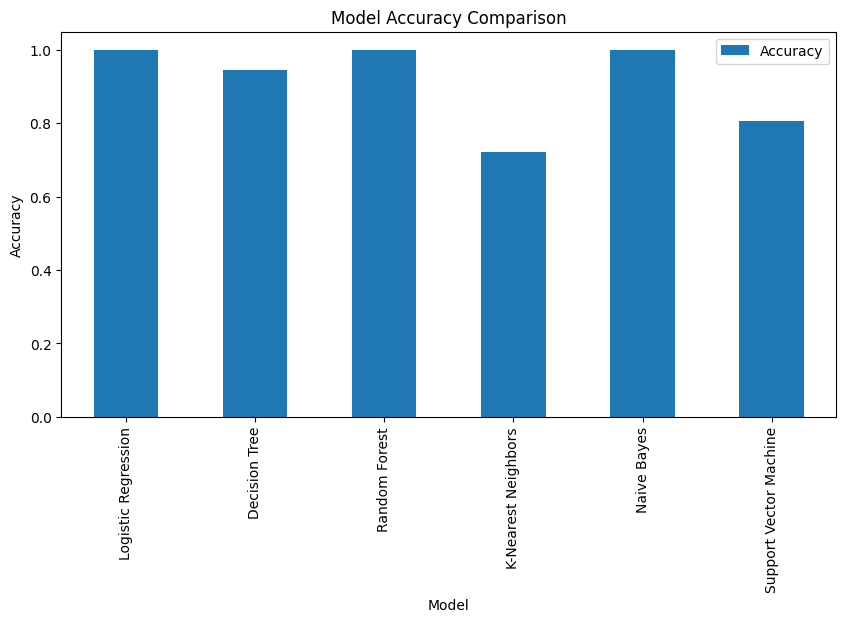

In [100]:
#Visual Comparison
results.plot(kind='bar', x='Model', y='Accuracy',figsize=(10,5))
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()